## Клепиков Никита Михайлович 6231-010402D

Подключаем необходимые библиотеки

In [1]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

np.random.seed(42)
warnings.filterwarnings('ignore')

Считываем таблицы features_train.csv и classes_train.csv

In [2]:
features = pd.read_csv('features_train.csv')
classes = pd.read_csv('classes_train.csv')

Добавляем метки классов и удаляем бинарные признаки

In [3]:
new = features.copy()
new['is_bot'] = pd.Series(classes['is_bot'], index = new.index)

Проверка на пропущенные значения

In [4]:
new.isnull().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
is_default_profile                 0
is_profile_use_background_image    0
is_verified                        0
user_age                           0
tweets_freq                        0
followers_growth_rate              0
friends_growth_rate                0
favourites_growth_rate             0
listed_growth_rate                 0
followers_friends_ratio            0
screen_name_length                 0
num_digits_in_screen_name          0
length_of_name                     0
num_digits_in_name                 0
description_length                 0
is_bot                             0
dtype: int64

Разделим данные на зависимые (y) и независимые (X)

In [5]:
X = new.drop('is_bot', axis = 1)
y = new.is_bot

Разделяем данные на обучающую и тестовую выборки

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## 1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

Создаём кортеж для сравнения значений F-меры

In [7]:
F = {'Logistic_Regression':0, 
     'K_Neighbors_Classifier':0, 
     'Decision_Tree_Classifier':0,
     'Random_Forest_Classifier':0 }

Логистическая регрессия

In [8]:
model_LR = LogisticRegression() 
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_LR.fit(X_train1, y_train)
y_LR = model_LR.predict(X_test1)

F['Logistic_Regression'] = f1_score(y_test, y_LR, average = "weighted")
F['Logistic_Regression']

0.9983353465631291

K - ближайших соседей

In [9]:
model_KNN = KNeighborsClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_KNN.fit(X_train1, y_train)
y_KNN = model_KNN.predict(X_test1)

F['K_Neighbors_Classifier'] = f1_score(y_test, y_KNN, average = "weighted")
F['K_Neighbors_Classifier']

0.9933169548355198

Decision Tree Classifier

In [10]:
model_DTC = DecisionTreeClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_DTC.fit(X_train1, y_train)
y_DTC = model_DTC.predict(X_test1)

F['Decision_Tree_Classifier'] = f1_score(y_test, y_DTC, average = "weighted")
F['Decision_Tree_Classifier']

0.9950060396893874

Random Forest Classifier

In [11]:
model_RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', model_RFC)]
pipe_RFC = Pipeline(steps_RFC)

model_RFC.fit(X_train, y_train)
y_RFC = model_RFC.predict(X_test)

F['Random_Forest_Classifier'] = f1_score(y_test, y_RFC, average = "weighted")
F['Random_Forest_Classifier']

0.9983312974530304

Сохраняем наилучшую модель

In [12]:
joblib.dump(model_LR, 'model_Logistic_Regression.joblib')

['model_Logistic_Regression.joblib']

## 2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

Корелляция признаков между собой

<AxesSubplot:>

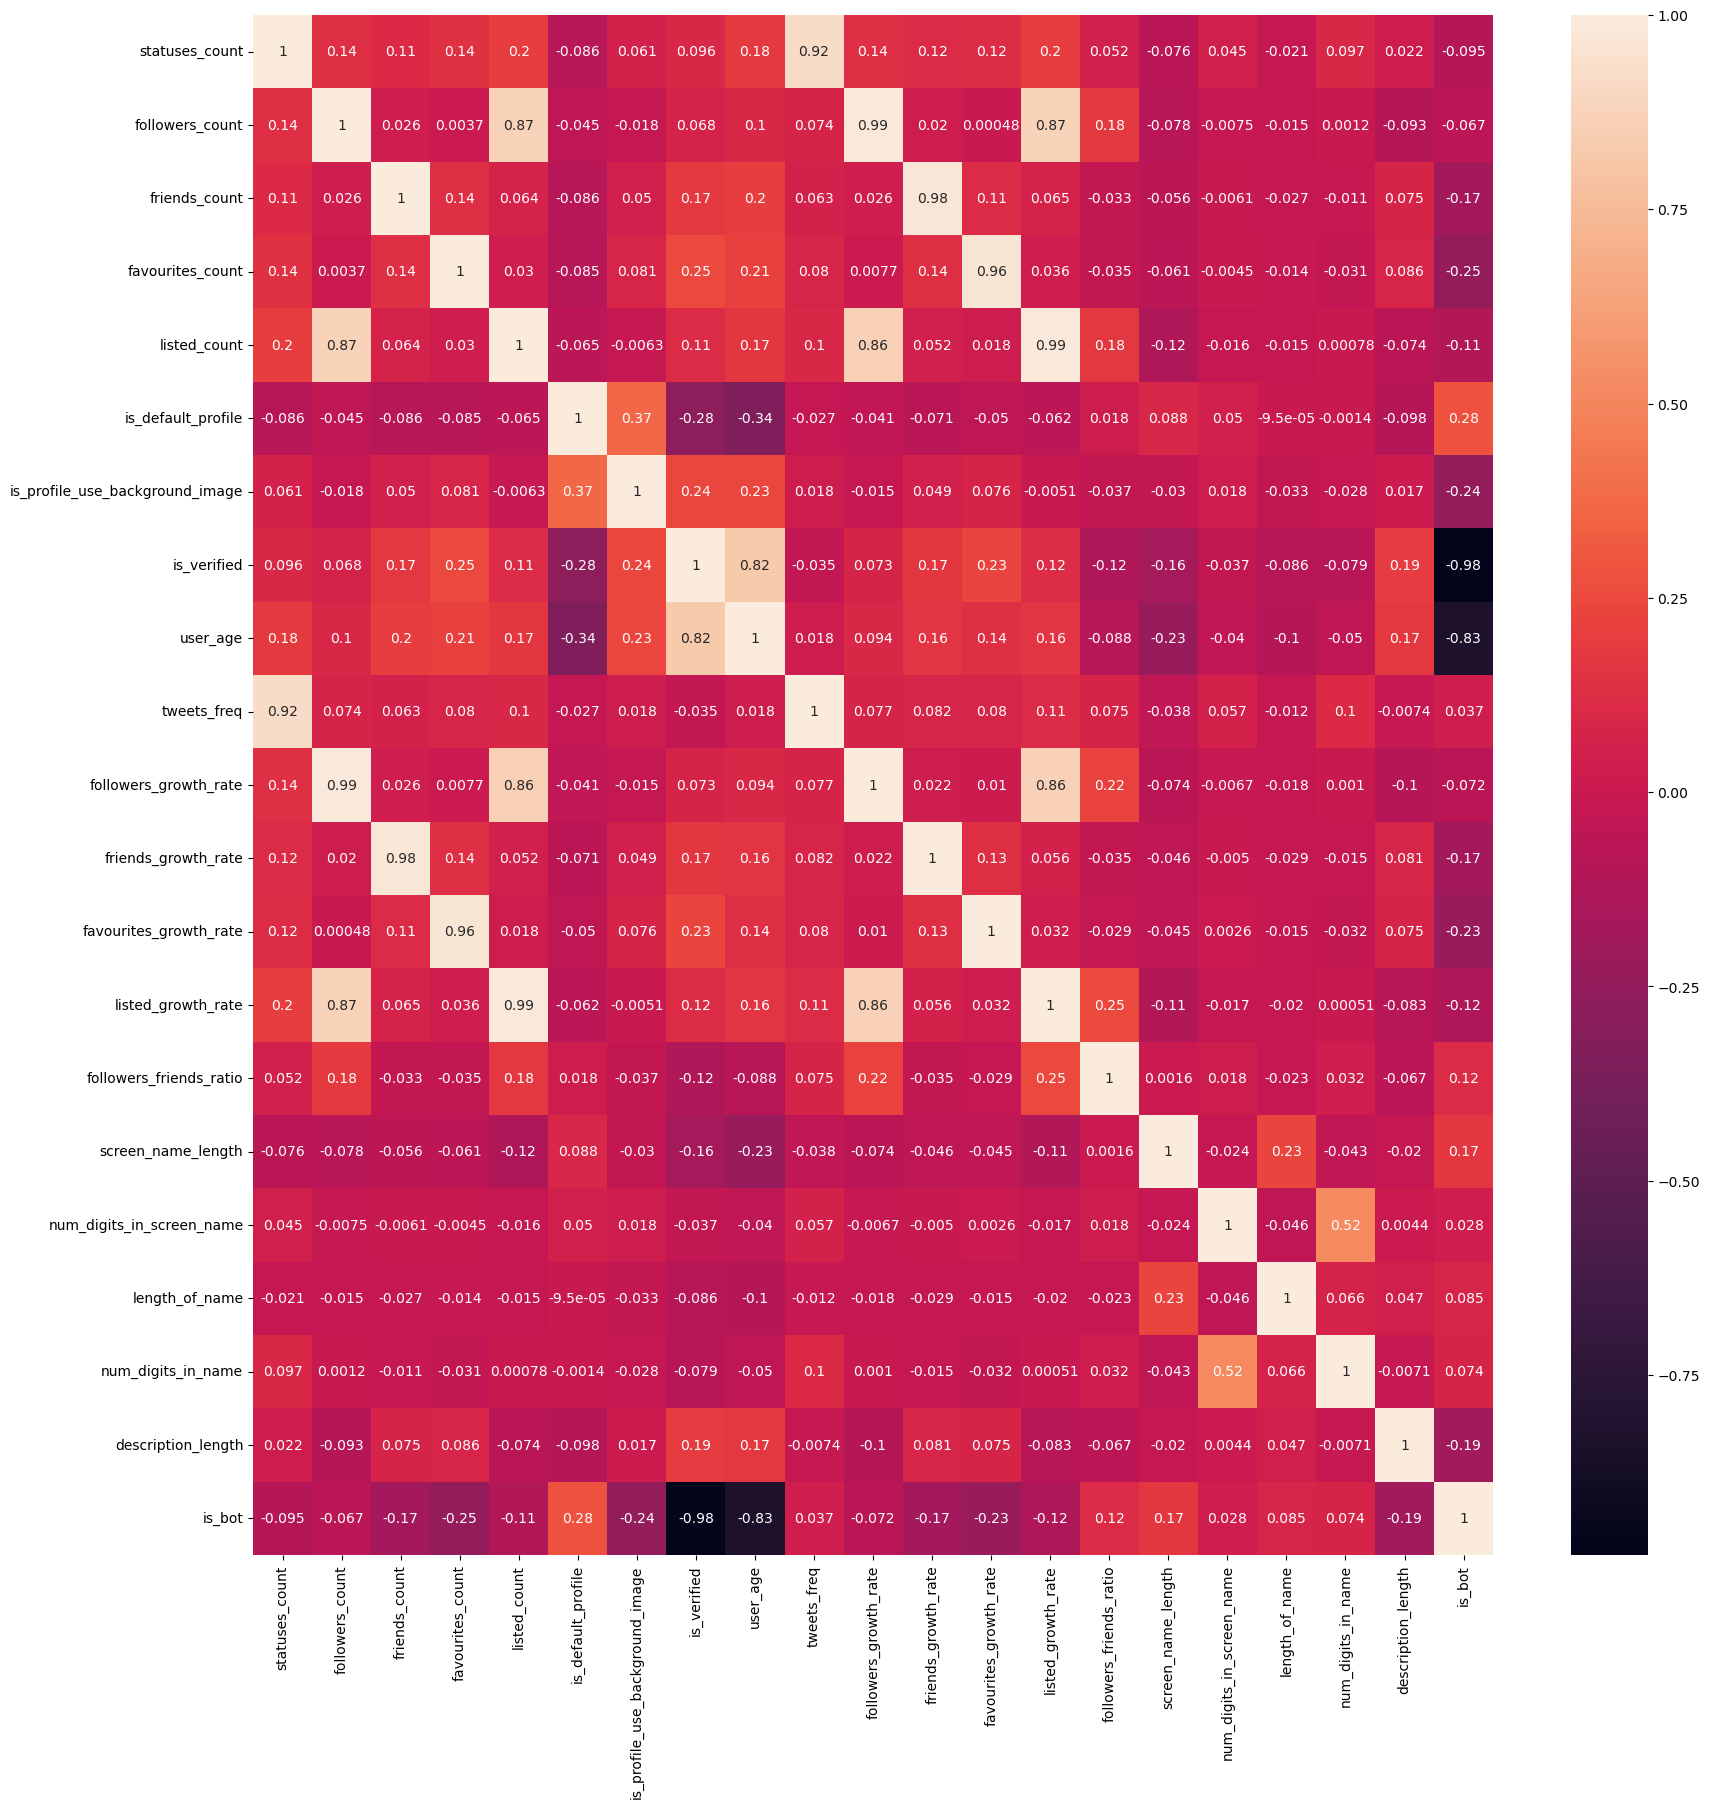

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(new.corr(), annot=True, ax=ax)

Слабо коррелируют с меткой is_bot:
* statuses_count
* followers_count
* tweets_freq
* followers_growth_rate
* num_digits_in_screen_name
* length_of_name
* num_digits_in_name

Слабо коррелируют с между собой:
* friends_growth_rate
* favourites_growth_rate
* listed_growth_rate    

In [14]:
new1 = new.drop(columns=[
    "statuses_count",
    "followers_count",
    "tweets_freq",
    "followers_growth_rate",
    "num_digits_in_screen_name",
    "length_of_name",
    "num_digits_in_name",
    "friends_growth_rate",
    "favourites_growth_rate",
    "listed_growth_rate"
], axis=1)

<AxesSubplot:>

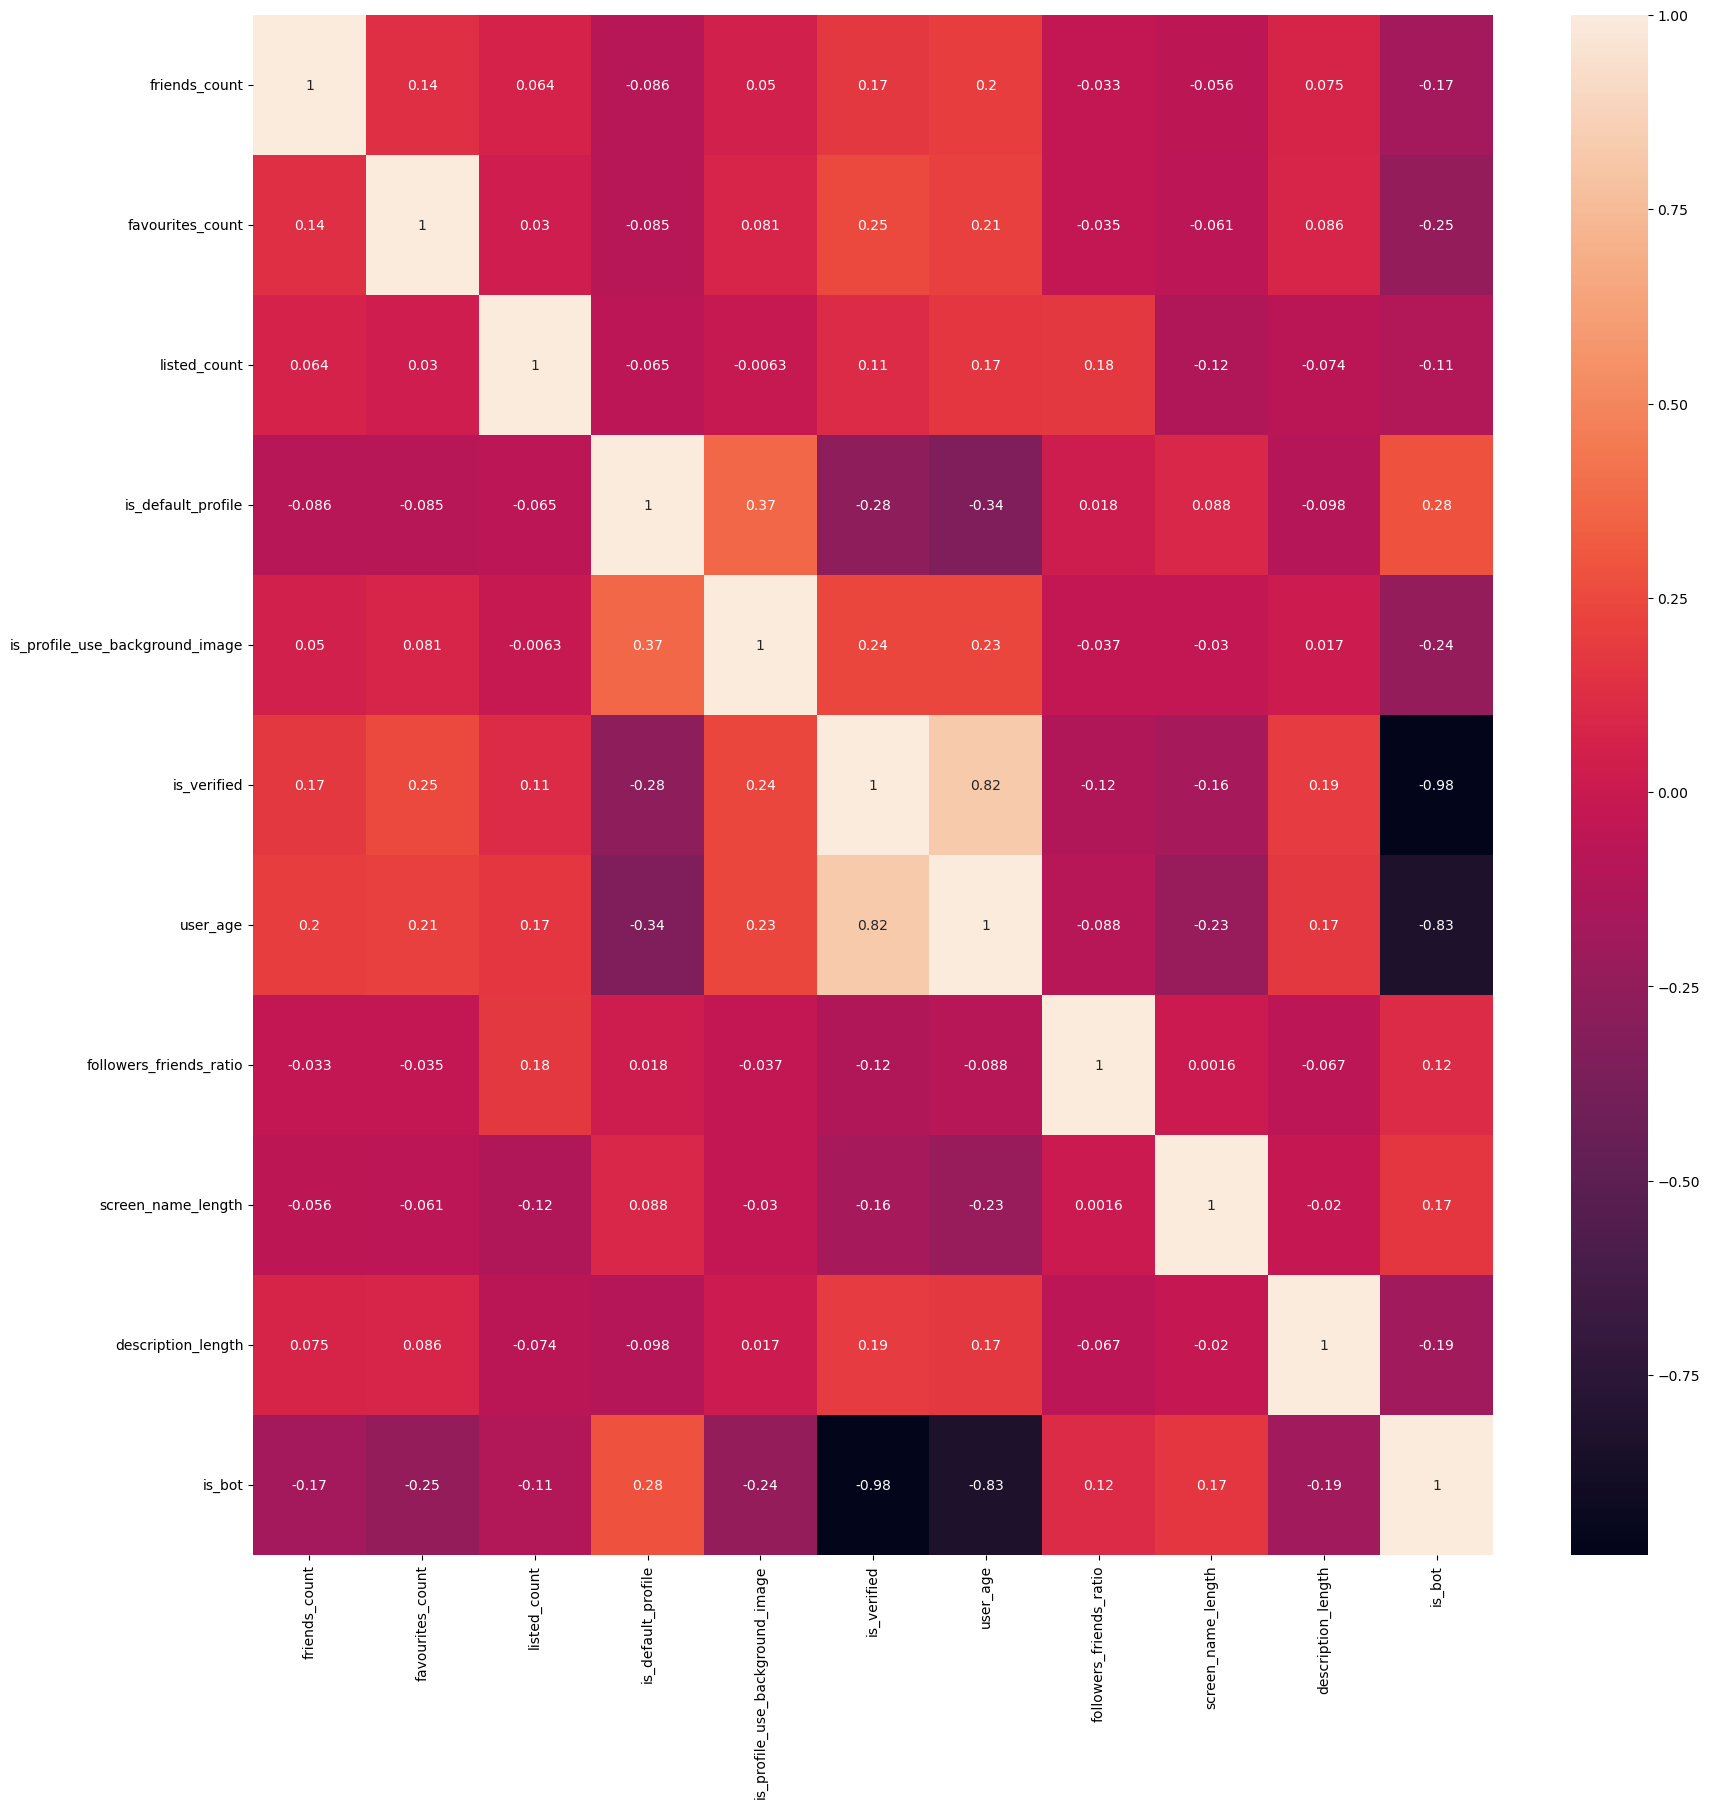

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(new1.corr(), annot=True, ax=ax)

In [16]:
X = new1.drop('is_bot', axis = 1)
y = new1.is_bot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
model_LR = LogisticRegression() 
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_LR.fit(X_train1, y_train)
y_LR = model_LR.predict(X_test1)

print('F1: ', f1_score(y_test, y_LR, average = "weighted"))
print('accuracy: ', accuracy_score(y_test, y_LR))

F1:  0.9950066083956572
accuracy:  0.995


In [18]:
model_KNN = KNeighborsClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_KNN.fit(X_train1, y_train)
y_KNN = model_KNN.predict(X_test1)

print('F1: ', f1_score(y_test, y_KNN, average = "weighted"))
print('accuracy: ', accuracy_score(y_test, y_KNN))

F1:  0.9966754281162884
accuracy:  0.9966666666666667


In [19]:
model_DTC = DecisionTreeClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_DTC.fit(X_train1, y_train)
y_DTC = model_DTC.predict(X_test1)

print('F1: ', f1_score(y_test, y_DTC, average = "weighted"))
print('accuracy: ', accuracy_score(y_test, y_DTC))

F1:  0.9933508562325765
accuracy:  0.9933333333333333


In [20]:
model_RFC = RandomForestClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_RFC.fit(X_train1, y_train)
y_RFC = model_RFC.predict(X_test1)

print('F1: ', f1_score(y_test, y_RFC, average = "weighted"))
print('accuracy: ', accuracy_score(y_test, y_RFC))

F1:  0.9966754281162884
accuracy:  0.9966666666666667


In [21]:
joblib.dump(model_KNN, 'model_KNN.joblib')

['model_KNN.joblib']

In [22]:
joblib.dump(model_RFC, 'model_RFC.joblib')

['model_RFC.joblib']

## 2.2. Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

Создаём кортеж для сравнения значений ошибок 1-ого и 2-ого рода

In [23]:
Error_I = {'Logistic_Regression':0, 
             'K_Neighbors_Classifier':0, 
             'Decision_Tree_Classifier':0,
             'Random_Forest_Classifier':0 }


Error_II = {'Logistic_Regression':0, 
             'K_Neighbors_Classifier':0, 
             'Decision_Tree_Classifier':0,
             'Random_Forest_Classifier':0 }

Разделим данные на зависимые (y) и независимые (X)

In [24]:
X = new1.drop('is_bot', axis = 1)
y = new1.is_bot

Разделяем данные на обучающую и тестовую выборки

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [26]:
test = y_test.shape[0]

Реализуем функцию расчёта метрики по матрице ошибок

In [27]:
def Metrics (confusion_matrix):
    Metrics_list = []
    num_classes = 2
    
    FP_val = []
    for i in range(num_classes):    
        FP_val.append(sum(confusion_matrix[:,i]) - confusion_matrix[i,i])
    FP = sum(FP_val)
    
    FN_val = []
    for i in range(num_classes):
        FN_val.append(sum(confusion_matrix[i,:]) - confusion_matrix[i,i])
    FN = (sum(FN_val))
    
    Metrics_list.append(FP)
    Metrics_list.append(FN)

    return Metrics_list

In [28]:
model_LR = LogisticRegression() 
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_LR.fit(X_train1, y_train)
y_LR = model_LR.predict(X_test1)

confusion_matrix_LR = confusion_matrix(y_test, y_LR)
Error_I['Logistic_Regression'] = Metrics (confusion_matrix_LR)[0] / test
Error_II['Logistic_Regression'] = Metrics (confusion_matrix_LR)[1] / test

In [29]:
model_KNN = KNeighborsClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_KNN.fit(X_train1, y_train)
y_KNN = model_KNN.predict(X_test1)

confusion_matrix_KNN = confusion_matrix(y_test, y_KNN)
Error_I['K_Neighbors_Classifier'] = Metrics (confusion_matrix_KNN)[0] / test
Error_II['K_Neighbors_Classifier'] = Metrics (confusion_matrix_KNN)[1] / test

In [30]:
model_DTC = DecisionTreeClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_DTC.fit(X_train1, y_train)
y_DTC = model_DTC.predict(X_test1)

confusion_matrix_DTC = confusion_matrix(y_test, y_DTC)
Error_I['Decision_Tree_Classifier'] = Metrics (confusion_matrix_DTC)[0] / test
Error_II['Decision_Tree_Classifier'] = Metrics (confusion_matrix_DTC)[1] / test

In [31]:
model_RFC = RandomForestClassifier()
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

model_RFC.fit(X_train1, y_train)
y_RFC = model_RFC.predict(X_test1)

confusion_matrix_RFC = confusion_matrix(y_test, y_RFC)
Error_I['Random_Forest_Classifier'] = Metrics (confusion_matrix_RFC)[0] / test
Error_II['Random_Forest_Classifier'] = Metrics (confusion_matrix_RFC)[1] / test

In [32]:
Error_I

{'Logistic_Regression': 0.01,
 'K_Neighbors_Classifier': 0.01,
 'Decision_Tree_Classifier': 0.006666666666666667,
 'Random_Forest_Classifier': 0.006666666666666667}

In [33]:
Error_II

{'Logistic_Regression': 0.01,
 'K_Neighbors_Classifier': 0.01,
 'Decision_Tree_Classifier': 0.006666666666666667,
 'Random_Forest_Classifier': 0.006666666666666667}

In [34]:
joblib.dump(model_RFC, 'model_Error_I_Random_Forest_Classifier.joblib')

['model_Error_I_Random_Forest_Classifier.joblib']

In [35]:
joblib.dump(model_DTC, 'model_Error_II_Decision_Tree_Classifier.joblib')

['model_Error_II_Decision_Tree_Classifier.joblib']